# quant-econ Solutions: The Linear State Space Model

Solutions for http://quant-econ.net/jl/linear_models.html

In [1]:
using QuantEcon
using Plots
pyplot()
using LaTeXStrings

## Exercise 1

[Plots.jl] Initializing backend: pyplot


2016-08-09 16:01:19.459 julia[5449:507] setCanCycle: is deprecated.  Please use setCollectionBehavior instead



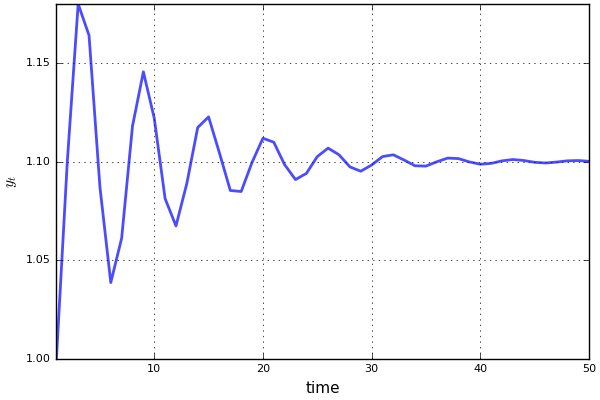

In [2]:
phi_0, phi_1, phi_2 = 1.1, 0.8, -0.8

A = [1.0   0.0   0
     phi_0 phi_1 phi_2
     0.0   1.0   0.0]
C = zeros(3, 1)
G = [0.0 1.0 0.0]
mu_0 = ones(3)

lss = LSS(A, C, G; mu_0=mu_0)

x, y = simulate(lss, 50)
plot(squeeze(y, 1), color=:blue, linewidth=2, alpha=0.7)
plot!(xlabel="time", ylabel=L"$y_t$", legend=:none)

## Exercise 2


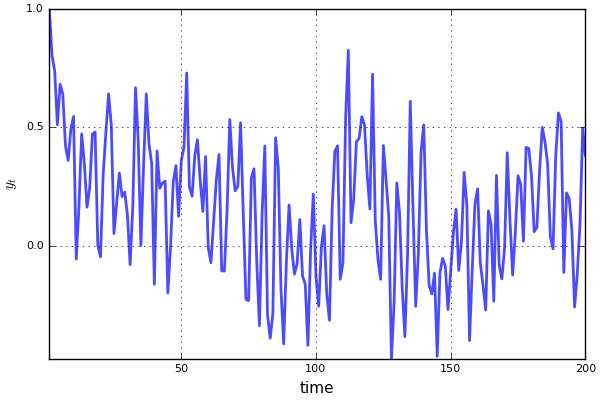

In [3]:
phi_1, phi_2, phi_3, phi_4 = 0.5, -0.2, 0, 0.5
sigma = 0.2

A = [phi_1 phi_2 phi_3 phi_4
     1.0   0.0   0.0   0.0
     0.0   1.0   0.0   0.0
     0.0   0.0   1.0   0.0]
C = [sigma
     0.0 
     0.0
     0.0]''
G = [1.0 0.0 0.0 0.0]

ar = LSS(A, C, G; mu_0=ones(4))
x, y = simulate(ar, 200)

plot(squeeze(y, 1), color=:blue, linewidth=2, alpha=0.7)
plot!(xlabel="time", ylabel=L"$y_t$", legend=:none)


## Exercise 3


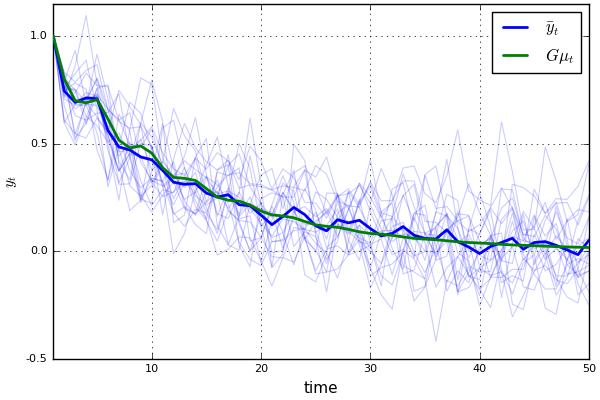

In [4]:
phi_1, phi_2, phi_3, phi_4 = 0.5, -0.2, 0, 0.5
sigma = 0.1

A = [phi_1 phi_2 phi_3 phi_4
     1.0   0.0   0.0   0.0
     0.0   1.0   0.0   0.0
     0.0   0.0   1.0   0.0]
C = [sigma
     0.0 
     0.0
     0.0]''
G = [1.0 0.0 0.0 0.0]
I = 20
T = 50
ar = LSS(A, C, G; mu_0=ones(4))
ymin, ymax = -0.5, 1.15

ensemble_mean = zeros(T)
ys = []
for i=1:I
    x, y = simulate(ar, T)
    y = squeeze(y, 1)
    push!(ys, y)
    ensemble_mean .+= y
end

ensemble_mean = ensemble_mean ./ I
plot(ys, color=:blue, alpha=0.2, linewidth=0.8, label="")
plot!(ensemble_mean, color=:blue, linewidth=2, label=L"$\bar y_t$")
m = @task moment_sequence(ar)
pop_means = Float64[]
for t=1:T
    mu_x, mu_y, Sigma_x, Sigma_y = consume(m)
    push!(pop_means, mu_y[1])
end
plot!(pop_means, color=:green, linewidth=2, label=L"$G\mu_t$")
plot!(ylims=(ymin, ymax), xlabel="time", ylabel=L"$y_t$", legendfont=font(12))


## Exercise 4


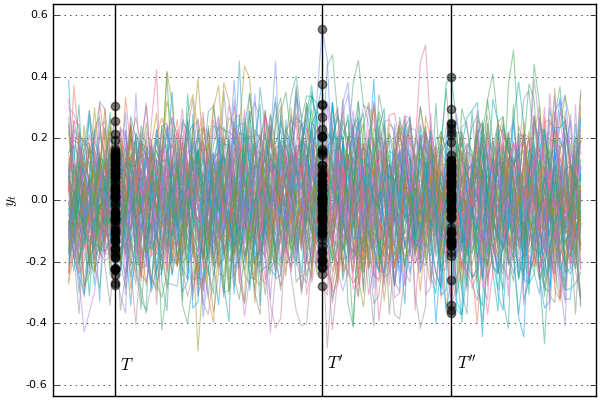

In [5]:
phi_1, phi_2, phi_3, phi_4 = 0.5, -0.2, 0, 0.5
sigma = 0.1

A = [phi_1 phi_2 phi_3 phi_4
     1.0   0.0   0.0   0.0
     0.0   1.0   0.0   0.0
     0.0   0.0   1.0   0.0]
C = [sigma
     0.0 
     0.0
     0.0]''
G = [1.0 0.0 0.0 0.0]

T0 = 10
T1 = 50
T2 = 75
T4 = 100

ar = LSS(A, C, G; mu_0=ones(4))
ymin, ymax = -0.6, 0.6

mu_x, mu_y, Sigma_x, Sigma_y = stationary_distributions(ar)
ar = LSS(A, C, G; mu_0=mu_x, Sigma_0=Sigma_x)
colors = ["c", "g", "b"]

ys = []
x_scatter = []
y_scatter = []
for i=1:80
    rcolor = colors[rand(1:3)]
    x, y = simulate(ar, T4)
    y = squeeze(y, 1)
    push!(ys, y)
    x_scatter = [x_scatter; T0; T1; T2]
    y_scatter = [y_scatter; y[T0]; y[T1]; y[T2]]
end

plot(ys, linewidth=0.8, alpha=0.5)
plot!([T0 T1 T2; T0 T1 T2], [-1 -1 -1; 1 1 1], color=:black, legend=:none)
scatter!(x_scatter, y_scatter, color=:black, alpha=0.5)
plot!(ylims=(ymin, ymax), ylabel=L"$y_t$", xticks=[], yticks=ymin:0.2:ymax)
plot!(annotations=[(T0+1, -0.55, L"$T$") (T1+1, -0.55, L"$T'$") (T2+1, -0.55, L"$T''$")]')